# DSC 550 - TERM PROJECT

## Project Milestone 1: Data Selection and EDA

Heart Disease is one of the major causes of death in the USA. Many factors contribute to the health of the heart. Understanding how different factors affect the heart can help in rectifying and make good choices to ensure a healthy heart and a long life.
The dataset that is being analyzed is captured by the CDC. Although many factors influence the heart directly or indirectly, some of the most relevant factors are being captured in this dataset which include, Smoking, Alcohol consumption, General health, Physical and Mental health, Age, race, sleep patterns, other pre-existing diseases like diabetics, Kidney health, Asthma, Cancer etc. 

Objective - The objecting of this project is to analyze the different factors that may contribute to the health of the heart and build a prediction model that can predict heart diseases in patients. The accurate prediction will help in identifying health issues in early stages and treating them in time.

Dataset - The dataset is retrieved from Kaggle.
https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

Below is the description of the columns. This is important to interpret the results appropriately.

Column Descriptions - 
HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).
BMI: Body Mass Index (BMI).
Smoking: Have you smoked at least 100 cigarettes in your entire life?
AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
Stroke: (Ever told) (you had) a stroke?
PhysicalHealth: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days).
MentalHealth: Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days).
DiffWalking: Do you have serious difficulty walking or climbing stairs?
Sex: Are you male or female?
AgeCategory: Fourteen-level age category. (then calculated the mean)
Race: Imputed race/ethnicity value.
Diabetic: (Ever told) (you had) diabetes?
PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.
GenHealth: Would you say that in general your health is...
SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
Asthma: (Ever told) (you had) asthma?
KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
SkinCancer: (Ever told) (you had) skin cancer?

In [35]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC ,SVR
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2

In [2]:
## Load the data

df_heart = pd.read_csv('heart_2020_cleaned.csv')
df_heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
#display the dimensions of the dataframe
df_heart.shape

(319795, 18)

In [4]:
df_heart.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [5]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

The dataset has 319795 rows with 18 columns.

HeartDisease column will be the target for this project. There are no null values in this dataset, which means we do not have to drop any rows.


In [6]:
#get summary statistics of the non-numerical data
df_heart.describe(include = ['O'])

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


Most of the columns have 2 unique values, Yes and No.
We also can see that the HeartDisease column has 292422 values as No and only 27373 values as Yes - reported any HeartDisease. 

The other columns or features represent a very similar trend, making this dataset very unbalanced. 
We will need to either undersample or oversampling during the data transformation phase.

Analyzing the data distribution is one of the primary steps to perform. This will help in understanding the dataset better and any data cleaning or transformation can be easily performed.
Plots like histograms, pie, bargraphs, scatterplots help in visualizing and understanding the data.

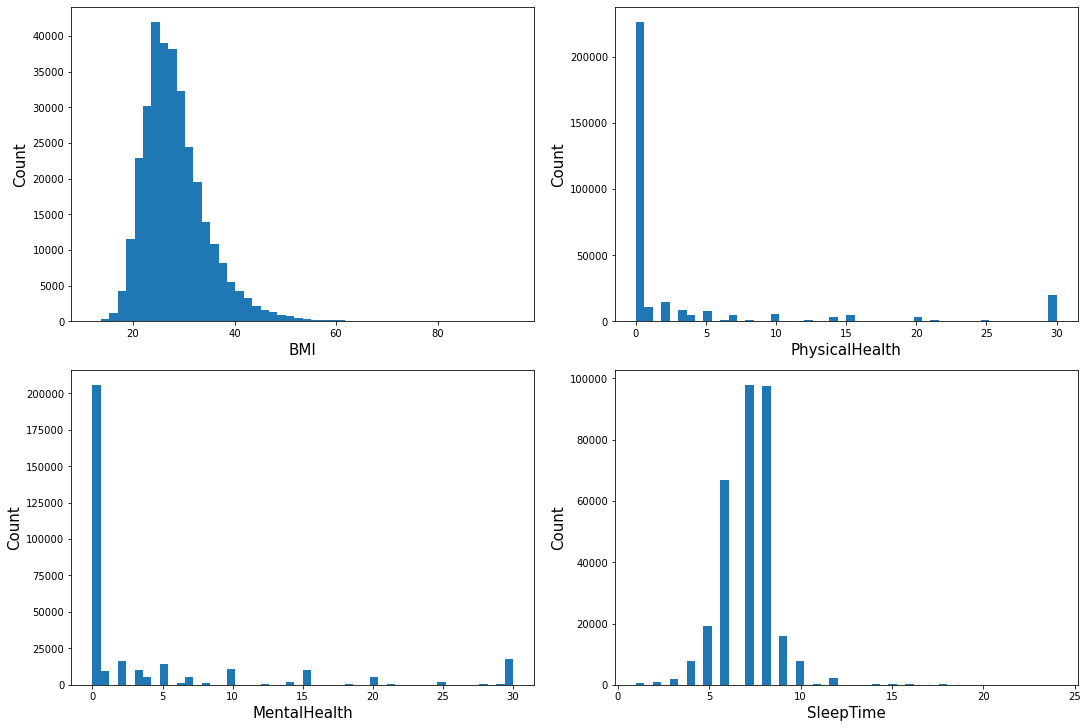

In [7]:
#get histograms of the numerical features
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(15, 10),constrained_layout=True)

ax1.hist(df_heart['BMI'].dropna(), bins=50)
ax1.set_xlabel('BMI', fontsize=15)
ax1.set_ylabel('Count', fontsize=15)

ax2.hist(df_heart['PhysicalHealth'].dropna(), bins=50)
ax2.set_xlabel('PhysicalHealth', fontsize=15)
ax2.set_ylabel('Count', fontsize=15)

ax3.hist(df_heart['MentalHealth'].dropna(), bins=50)
ax3.set_xlabel('MentalHealth', fontsize=15)
ax3.set_ylabel('Count', fontsize=15)

ax4.hist(df_heart['SleepTime'].dropna(), bins=50)
ax4.set_xlabel('SleepTime', fontsize=15)
ax4.set_ylabel('Count', fontsize=15)

plt.show()

From the above histograms we can observe - 
1. The BMI is concentrated between 25-35
2. Most of the respondents did not have any bad physical or mental health days
3. Most respondents were getting 6-8 hours of sleep per night.

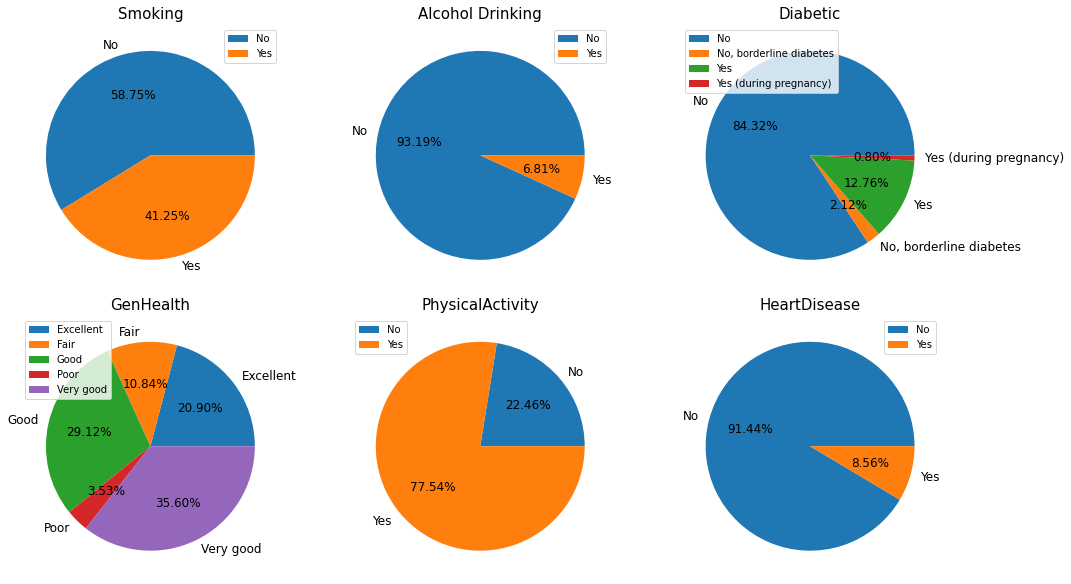

In [8]:
#get pie graphs of the categorical features to analyze the data distribution

fig, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(2, 3, figsize=(15, 8),constrained_layout=True)

##Smoking

X_Smoking = df_heart.groupby('Smoking').size().reset_index(name='Counts')['Smoking']
Y_Smoking = df_heart.groupby('Smoking').size().reset_index(name='Counts')['Counts']
ax1.pie(Y_Smoking, labels = X_Smoking, autopct='%.2f%%',textprops={'fontsize': 12})
ax1.set_title('Smoking', fontsize=15)
ax1.legend()

## Alcohol Drinking

X_Alcohol = df_heart.groupby('AlcoholDrinking').size().reset_index(name='Counts')['AlcoholDrinking']
Y_Alcohol = df_heart.groupby('AlcoholDrinking').size().reset_index(name='Counts')['Counts']
ax2.pie(Y_Alcohol, labels = X_Alcohol, autopct='%.2f%%',textprops={'fontsize': 12})
ax2.set_title('Alcohol Drinking', fontsize=15)
ax2.legend()

## Diabetic

X_Diabetic = df_heart.groupby('Diabetic').size().reset_index(name='Counts')['Diabetic']
Y_Diabetic = df_heart.groupby('Diabetic').size().reset_index(name='Counts')['Counts']
ax3.pie(Y_Diabetic, labels = X_Diabetic, autopct='%.2f%%',textprops={'fontsize': 12})
ax3.set_title('Diabetic', fontsize=15)
ax3.legend(loc='upper left')

## GenHealth

X_GenHealth = df_heart.groupby('GenHealth').size().reset_index(name='Counts')['GenHealth']
Y_GenHealth = df_heart.groupby('GenHealth').size().reset_index(name='Counts')['Counts']
ax4.pie(Y_GenHealth, labels = X_GenHealth, autopct='%.2f%%',textprops={'fontsize': 12})
ax4.set_title('GenHealth', fontsize=15)
ax4.legend(loc='upper left')

## PhysicalActivity

X_PhysicalActivity = df_heart.groupby('PhysicalActivity').size().reset_index(name='Counts')['PhysicalActivity']
Y_PhysicalActivity = df_heart.groupby('PhysicalActivity').size().reset_index(name='Counts')['Counts']
ax5.pie(Y_PhysicalActivity, labels = X_PhysicalActivity, autopct='%.2f%%',textprops={'fontsize': 12})
ax5.set_title('PhysicalActivity', fontsize=15)
ax5.legend()


## HeartDisease

X_HeartDisease = df_heart.groupby('HeartDisease').size().reset_index(name='Counts')['HeartDisease']
Y_HeartDisease = df_heart.groupby('HeartDisease').size().reset_index(name='Counts')['Counts']
ax6.pie(Y_HeartDisease, labels = X_HeartDisease, autopct='%.2f%%',textprops={'fontsize': 12})
ax6.set_title('HeartDisease', fontsize=15)
ax6.legend()

From the above pie graphs, the below observations can be inferred -
1. The Heart Disease distribution is very unbalanced, in that the dataset sample that we are considering does not have a balanced response. Only about 8.56% respondents have reports heart disease. Therefore to build a prediction model, the dataset may need to be undersampled or oversampled.

Reference - https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/

In [9]:
## let's analyze the data with in the Heart Disease reported 

df_hd_yes = df_heart[df_heart["HeartDisease"]=='Yes']
df_hd_yes

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
10,Yes,34.30,Yes,No,No,30.0,0.0,Yes,Male,60-64,White,Yes,No,Poor,15.0,Yes,No,No
35,Yes,32.98,Yes,No,Yes,10.0,0.0,Yes,Male,75-79,White,Yes,Yes,Poor,4.0,No,No,Yes
42,Yes,25.06,No,No,No,0.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,7.0,No,No,Yes
43,Yes,30.23,Yes,No,No,6.0,2.0,Yes,Female,75-79,White,Yes,Yes,Fair,8.0,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319765,Yes,38.45,No,No,Yes,30.0,15.0,Yes,Female,55-59,Hispanic,Yes,Yes,Poor,6.0,Yes,No,No
319767,Yes,36.21,Yes,No,No,0.0,0.0,Yes,Female,75-79,Hispanic,Yes,Yes,Good,8.0,No,No,No
319781,Yes,37.12,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,7.0,No,No,No
319786,Yes,33.20,Yes,No,No,0.0,0.0,No,Female,60-64,Hispanic,Yes,Yes,Very good,8.0,Yes,No,No


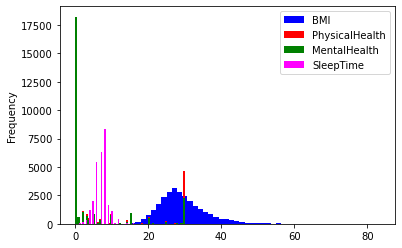

In [10]:
## Analysis of the factors when respondants report heart disease

fig, (ax1) = plt.subplots()
#plt.style.use('ggplot')

ax1.hist(df_hd_yes["BMI"], bins=50,color="Blue", label="BMI")
#ax1.hist(df_heart[df_heart["HeartDisease"]=='No']["BMI"], bins=50, color="Green",alpha=0.3, label="No HeartDisease")
ax1.hist(df_hd_yes["PhysicalHealth"], bins=50,color="Red", label="PhysicalHealth")
ax1.hist(df_hd_yes["MentalHealth"], bins=50,color="Green", label="MentalHealth")
ax1.hist(df_hd_yes["SleepTime"], bins=50,color="Magenta", label="SleepTime")
#ax1.set_xlabel("BMI")
ax1.set_ylabel("Frequency")
ax1.legend()


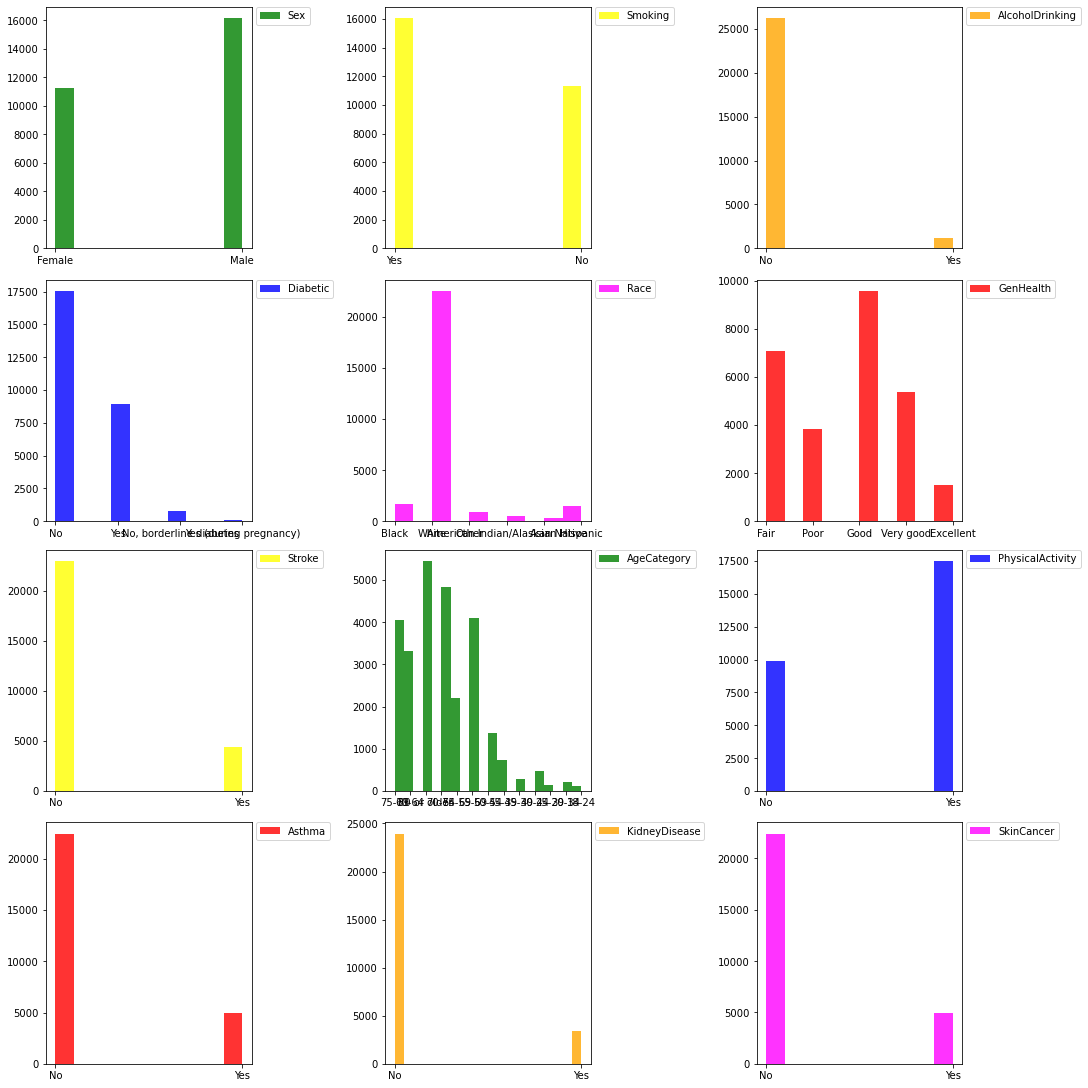

In [11]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12)) = plt.subplots(4, 3, figsize=(15, 15),constrained_layout=True)

ax1.hist(df_hd_yes["Sex"], bins=10, alpha=0.8, color="Green", label="Sex")
ax1.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

ax2.hist(df_hd_yes["Smoking"], bins=10, alpha=0.8, color="Yellow", label="Smoking")
ax2.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

ax3.hist(df_hd_yes["AlcoholDrinking"], bins=10, alpha=0.8, color="Orange", label="AlcoholDrinking")
ax3.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

ax4.hist(df_hd_yes["Diabetic"], bins=10, alpha=0.8, color="Blue", label="Diabetic")
ax4.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

ax5.hist(df_hd_yes["Race"], bins=10, alpha=0.8, color="Magenta", label="Race")
ax5.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

ax6.hist(df_hd_yes["GenHealth"], bins=10, alpha=0.8, color="Red", label="GenHealth")
ax6.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

ax7.hist(df_hd_yes["Stroke"], bins=10, alpha=0.8, color="Yellow", label="Stroke")
ax7.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

ax8.hist(df_hd_yes["AgeCategory"], bins=20, alpha=0.8, color="Green", label="AgeCategory")
ax8.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

ax9.hist(df_hd_yes["PhysicalActivity"], bins=10, alpha=0.8, color="Blue", label="PhysicalActivity")
ax9.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

ax10.hist(df_hd_yes["Asthma"], bins=10, alpha=0.8, color="Red", label="Asthma")
ax10.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

ax11.hist(df_hd_yes["KidneyDisease"], bins=20, alpha=0.8, color="Orange", label="KidneyDisease")
ax11.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

ax12.hist(df_hd_yes["SkinCancer"], bins=10, alpha=0.8, color="Magenta", label="SkinCancer")
ax12.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

Analyzing the dataset which has reported Heart disease will provide a closer look at the factors that may influence the health of the heart.
From the above we observe,
1. Males are more susceptible to heart diseases.
2. Smoking seems to play a crucial role in the heart's health.
3. At a first glance, being diabetic may not translate to having poor heart health, but about 40% of respondents were diabetic. We may conclude that keep a check on the diabetese is important for health of the heart.
4. Interestingly, the White race seem to have reported the highest heart diseases. But one has to wonder if the sampling or data collection was done in a heavy white population areas.
5. General health also plays a role in determining the heart health. If you combine fair, poor, good general health, then it seems to affect the heart.
6. About 40% respondents that reported heart disease responded No to physical activity making it another crucial factor to consider.
7. Other diseases like Asthma, Kidney disease, Skin cancer do not seem to contribute significantly in determining the heart health.
8. Most respondents that reported heart disease are over 50 making age a factor in determining the heart's health.

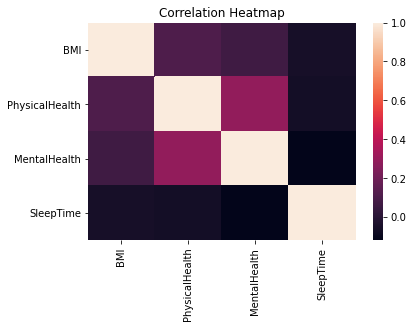

In [12]:
# Use Seaborn to create a correlation heatmap to review for possible relationships
ax = plt.axes()
sns.heatmap(df_heart.corr(), ax = ax)
ax.set_title('Correlation Heatmap')
plt.show()

There does not seem to be any correlation between the features.

Further analysis and transfomation is required to build the prediction model. As stated earlier, this dataset is highly unbalanced. 
This exercise has provided valuable information about all the features and a direction towards data prepping and transformations required. The building of the best model to predict the Heart disease will depend on the balancing of the data and selecting relevant and significant features.

## Project Milestone 2 - DATA PREPERATION

In [13]:
df_heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [14]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

#### There are no null values in the dataset. 
#### All columns seem like they are required features.

In [15]:
## Find the number of Unique values in the categorical columns
df_heart.nunique() 

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

1. Few columns like Smoking, AlcoholDrinking, Stroke etc. have only 2 distinct values. Converting them to 0 and 1 would be a sufficient, dummies are not needed for them.
Smoking                2
AlcoholDrinking        2
Stroke                 2
DiffWalking            2
PhysicalActivity       2
Asthma                 2
KidneyDisease          2
SkinCancer             2
2. Columns like AgeCategory, Race, GenHealth, Diabetic - dummies can be created since they have more than 2 values but still are categorical columns.
Race                   6
Diabetic               4
GenHealth              5

In [16]:
## converting categorical values to 0 and 1

df_heart_clean = df_heart.copy()

for col in ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 
            'DiffWalking', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']:
    df_heart_clean[col] = df_heart_clean[col].apply(lambda x: 1 if x == 'Yes' else 0)

df_heart_clean.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,Yes,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,No,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,Yes,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,No,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,No,1,Very good,8.0,0,0,0


In [17]:
print('Unique values for Race: ', df_heart['Race'].unique() )
print('Unique values for Diabetic: ', df_heart['Diabetic'].unique() )
print('Unique values for GenHealth: ', df_heart['GenHealth'].unique() )

Unique values for Race:  ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Unique values for Diabetic:  ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
Unique values for GenHealth:  ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']


In [18]:
## Create Dummies for the categorical columns that have more than 2 values

df_heart_clean_dum = pd.get_dummies(df_heart_clean, columns=['Race', 'Diabetic', 'GenHealth'])
df_heart_clean_dum.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,...,1,0,0,1,0,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,...,1,1,0,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,...,1,0,0,1,0,0,1,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,...,1,1,0,0,0,0,0,1,0,0
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,...,1,1,0,0,0,0,0,0,0,1


In [19]:
print('Number of respondents with/without heart disease: \n', (df_heart_clean_dum['HeartDisease']).value_counts())


Number of respondents with/without heart disease: 
 0    292422
1     27373
Name: HeartDisease, dtype: int64


#### The dataset is not balanced, there is way more number of samples for people who have no Heart Disease than people with Heart Disease. This can be fixed by oversampling the data

In [20]:
class_0 = df_heart_clean_dum[df_heart_clean_dum['HeartDisease'] == 0]
class_1 = df_heart_clean_dum[df_heart_clean_dum['HeartDisease'] == 1]

class_1 = class_1.sample(len(class_0),replace=True)
df_heart_balanced = pd.concat([class_0, class_1], axis=0)

print('Data in Heart Dataset:')
print(df_heart_balanced['HeartDisease'].value_counts())

Data in Heart Dataset:
0    292422
1    292422
Name: HeartDisease, dtype: int64


In [21]:
##df_heart_balanced.info()

#### The range of continuous features are different.
#### Therefore scaling them to be in-between 0 to 1 by dividing by the maximum value of the respective column

In [22]:
## making ageCategory a continuous feature - 
encode_AgeCategory = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}
df_heart_balanced['AgeCategory'] = df_heart_balanced['AgeCategory'].apply(lambda x: encode_AgeCategory[x])
df_heart_balanced['AgeCategory'] = df_heart_balanced['AgeCategory'].astype('float')




In [23]:
## scaling the continuous columns
for col in ['BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 'SleepTime']:
    df_heart_balanced[col] = df_heart_balanced[col]/df_heart_balanced[col].max()

In [24]:
# Integer encode columns with 2 unique values
for col in ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']:
    if df_heart_balanced[col].dtype == 'O':
        le = LabelEncoder()
        df_heart_balanced[col] = le.fit_transform(df_heart_balanced[col])

In [25]:
df_heart_balanced.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,0.175013,1,0,0,0.100000,1.0,0,0,0.7125,...,1,0,0,1,0,0,0,0,0,1
1,0,0.214444,0,0,1,0.000000,0.0,0,0,1.0000,...,1,1,0,0,0,0,0,0,0,1
2,0,0.280232,1,0,0,0.666667,1.0,0,1,0.8375,...,1,0,0,1,0,0,1,0,0,0
3,0,0.255245,0,0,0,0.000000,0.0,0,0,0.9625,...,1,1,0,0,0,0,0,1,0,0
4,0,0.249974,0,0,0,0.933333,0.0,1,0,0.5250,...,1,1,0,0,0,0,0,0,0,1


#### Now, the dataset is balanced with oversampling.
#### The next step is to build a model on the training and test sets of the dataset.

## Project Milestone 3 - MODEL BUILDING AND EVALUATION

#### The next step is to split the data set into training and test sets for model evaluations.

In [40]:
## split dataset into x_train, y_train, x_test, y_test

## Split data for independent/dependent variables
x = df_heart_balanced.drop(['HeartDisease'], axis=1)
y = df_heart_balanced['HeartDisease']

## Split data into training and test sets (70% training / 30% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#reset indices in the training and test sets to prevent pandas slicing warnings
x_train = x_train.reset_index(drop = True) #drop + True drops the previous index
x_test = x_test.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

In [41]:
#show the sizes of the training and test sets
print(x_train.shape)
print(x_test.shape)

(409390, 29)
(175454, 29)


In [28]:
#see how many Heart Disease respondants are in training and test sets
print('Training set: ')
print(y_train.value_counts())

print('Testing set: ')
print(y_test.value_counts())

Training set: 
0    204811
1    204579
Name: HeartDisease, dtype: int64
Testing set: 
1    87843
0    87611
Name: HeartDisease, dtype: int64


### Logistic Regression Model

In [31]:
#instantiate the logistic regression model 
logreg = LogisticRegression(max_iter=500)
#fit the model to the training set
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)
print('LogisticRegression - Classification Report: ', classification_report(y_test,y_pred))

LogisticRegression - Classification Report:                precision    recall  f1-score   support

           0       0.77      0.75      0.76     87611
           1       0.76      0.78      0.77     87843

    accuracy                           0.76    175454
   macro avg       0.76      0.76      0.76    175454
weighted avg       0.76      0.76      0.76    175454



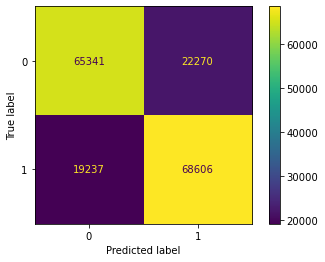

In [85]:
#initialize the confusion matrix
cm = confusion_matrix(y_test,y_pred,labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=logreg.classes_)

disp.plot()
plt.show()

### Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

print('RandomForestClassifier - Classification Report: ', classification_report(y_test,y_pred))

RandomForestClassifier - Classification Report:                precision    recall  f1-score   support

           0       1.00      0.93      0.96     87611
           1       0.93      1.00      0.97     87843

    accuracy                           0.96    175454
   macro avg       0.97      0.96      0.96    175454
weighted avg       0.97      0.96      0.96    175454



### KNeighborsClassifier

In [33]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print('KNeighborsClassifier - Classification Report: ')
print(classification_report(y_test,y_pred))

RandomForestClassifier - Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.78      0.87     87611
           1       0.82      0.99      0.90     87843

    accuracy                           0.89    175454
   macro avg       0.90      0.89      0.89    175454
weighted avg       0.90      0.89      0.89    175454



Logistic Model is returning a 76% accuracy rate
RandomForest Classifier model is returning a 96% accuracy
KNeighbors Classifier model is at 89% accuracy rate for this dataset.

### Selecting the top best features for prediction

In [72]:
## Use a χ2-statistic selector to pick the top best features for this data

selector = SelectKBest(chi2, k=20)
features_kbest = selector.fit_transform(x_train, y_train)

## Compare number of features
print("Original Number of Features: " + str(x_train.shape))
print("Reduced Number of Features: " + str(features_kbest.shape))
cols = selector.get_support(indices=True).tolist()
print("\nSelected Features: ")
df_heart_balanced.iloc[:,cols].columns.tolist()

Original Number of Features: (409390, 29)
Reduced Number of Features: (409390, 20)

Selected Features: 


['BMI',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'MentalHealth',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'SleepTime',
 'Asthma',
 'KidneyDisease',
 'Race_American Indian/Alaskan Native',
 'Race_Black',
 'Race_White',
 'Diabetic_No, borderline diabetes',
 'Diabetic_Yes (during pregnancy)',
 'GenHealth_Excellent',
 'GenHealth_Fair',
 'GenHealth_Good',
 'GenHealth_Poor']

#### 20 top features selected 

In [73]:
x_test_feature = selector.transform(x_test)

logreg = LogisticRegression(max_iter=500)
logreg.fit(features_kbest, y_train)
y_pred = logreg.predict(x_test_feature)
print('LogisticRegression - Classification Report post feature selection: ')
print(classification_report(y_test,y_pred))

LogisticRegression - Classification Report post feature selection: 
              precision    recall  f1-score   support

           0       0.77      0.75      0.76     87611
           1       0.75      0.78      0.77     87843

    accuracy                           0.76    175454
   macro avg       0.76      0.76      0.76    175454
weighted avg       0.76      0.76      0.76    175454



#### The Logistic regression model is at 76% accuracy with 15 top features onwards. 

### Calculating the correlation between features and target

<AxesSubplot:>

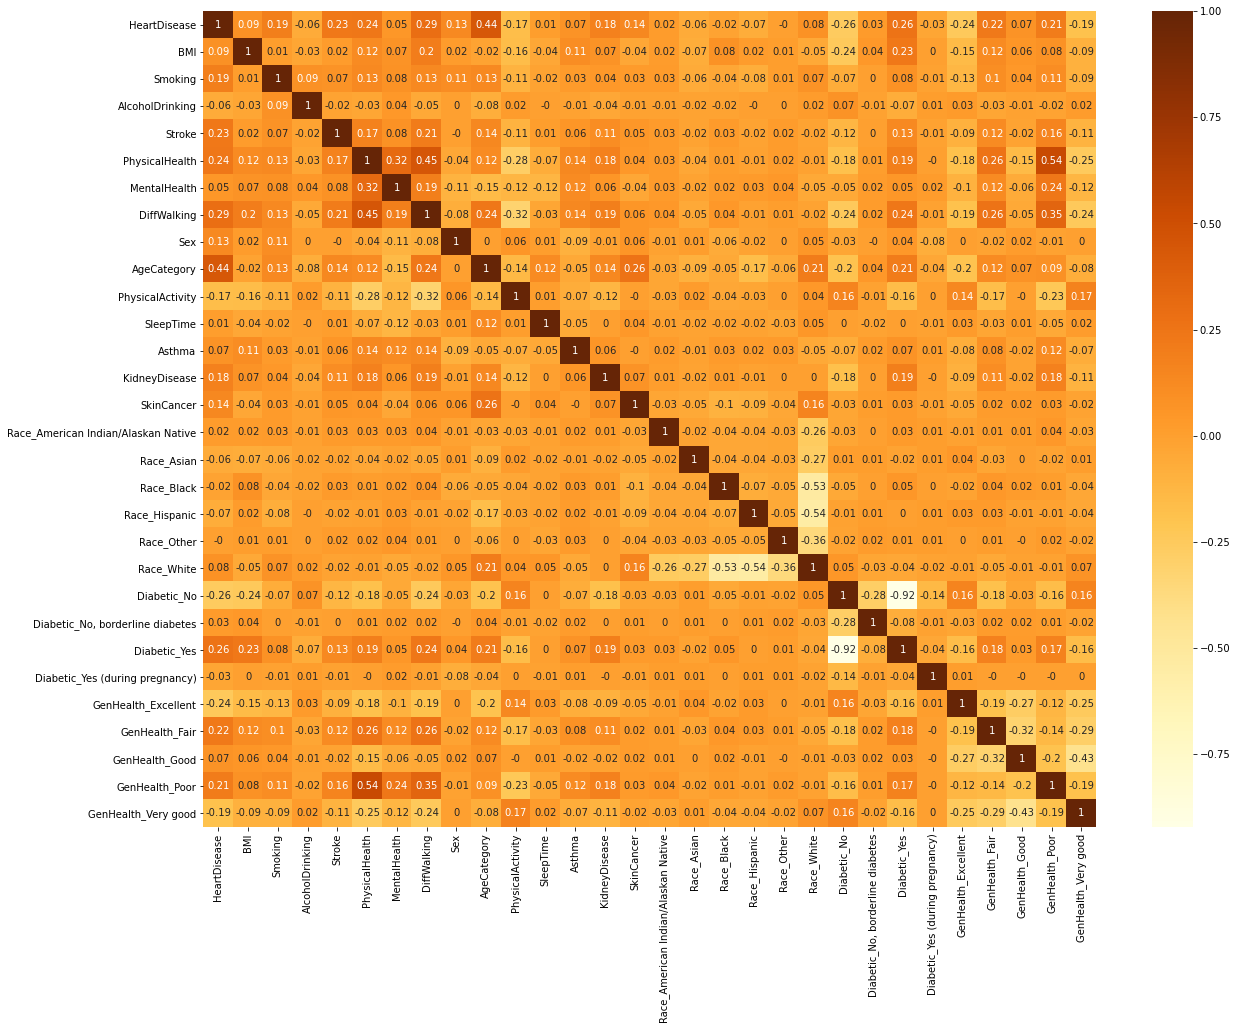

In [77]:
correlation = df_heart_balanced.corr().round(2)
plt.figure(figsize = (20,15))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

The features that most affect the heart are Age factor, Diabetes, experience difficulty in walking, physical health and General Health being less than good, if there was an incident of Stroke. Smoking, pre-existing Kidney and skin cancer issues may also contribute significantly to a weak heart. There also seems to be the factor of gender but that is quite low to be deterministic in our prediction.

Overall, the models predictions are varying largely to be able to choose the best. 
It is possible that the large difference is due to the oversampling process that was done on the highly unbalanced orginal dataset.
All said and done, the important factors affecting the heart are the well-known offenders which include age, general health conditions, and pre-existing conditions such as Diabetes.
Whether someone has reported a heart disease or not, the above factors need to taken care of for a healthy heart at any time.